# Approches for Clusterings
1. Agglomerative- It is also called bottom-up appproach. It firsts considers all the points as individual clusters and then found out the similarity b/w two points and puts them into a Cluster.
2. Divisive- It is also called top down cluster. It is opp. to agglomerative approach, Its first consider all the popints to be a part of one big cluster and then break the biggers clusters into smaller ones

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
dataset = pd.read_csv(r'https://raw.githubusercontent.com/training-ml/Files/main/Mall_Customers.csv')
dataset.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [6]:
X = dataset[['Annual Income (k$)','Spending Score (1-100)']]
X.head()

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


In [7]:
import scipy.cluster.hierarchy as sch

# Methods
. Single linkage
. Complete linkage
. Average linkage
. Centroid linkage
. Ward linkage

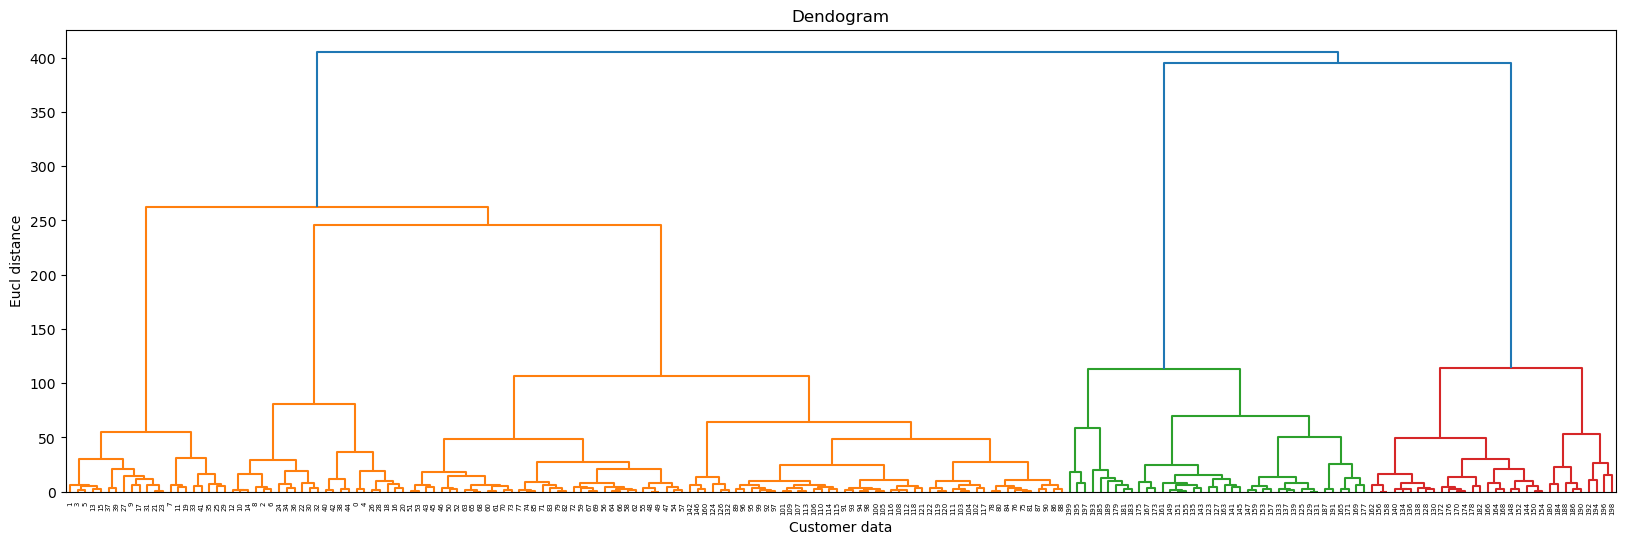

In [8]:
plt.figure(figsize=(20,6))
dendo = sch.dendrogram(sch.linkage(X,method='ward'))
plt.title('Dendogram')
plt.xlabel('Customer data')
plt.ylabel('Eucl distance')
plt.show()

In [9]:
from sklearn.cluster import AgglomerativeClustering

In [10]:
group = AgglomerativeClustering(n_clusters=3)
cluster = group.fit_predict(X)
print(cluster)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 2 0 2 0 2 1 2 1 2 0 2 1 2 1 2 1 2 1 2 0 2 1 2 0 2
 1 2 1 2 1 2 1 2 1 2 1 2 0 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1
 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2]


In [11]:
from sklearn.metrics import silhouette_score

In [12]:
silhouette_score(X,cluster)

0.4618340266628975

In [13]:
customer_cluster_0 = dataset[cluster==0]
customer_cluster_1 = dataset[cluster==1]
customer_cluster_2 = dataset[cluster==2]

In [15]:
print(customer_cluster_2)

     CustomerID   Genre  Age  Annual Income (k$)  Spending Score (1-100)
123         124    Male   39                  69                      91
125         126  Female   31                  70                      77
127         128    Male   40                  71                      95
129         130    Male   38                  71                      75
131         132    Male   39                  71                      75
133         134  Female   31                  72                      71
135         136  Female   29                  73                      88
137         138    Male   32                  73                      73
139         140  Female   35                  74                      72
141         142    Male   32                  75                      93
143         144  Female   32                  76                      87
145         146    Male   28                  77                      97
147         148  Female   32                  77   

# DBSCAN
Its an unsupervised ML algorithm.This algorithm defines clusters as continous regions of high density
It defines as folloeing
. Epsilon-- It is also called eps. this is the distance till which we look for the neighboring points
. Min_points
. Core_points
. Border_points
. Noise

In [16]:
import numpy as np
from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler

In [17]:
centers = [[1,1],[-1,-1],[1,-1]]
X,labels_true = make_blobs(n_samples=750,centers=centers,cluster_std=0.4,random_state=0)

In [18]:
X = StandardScaler().fit_transform(X)
X[:5]

array([[ 0.49426097,  1.45106697],
       [-1.42808099, -0.83706377],
       [ 0.33855918,  1.03875871],
       [ 0.11900101, -1.05397553],
       [ 1.1224246 ,  1.77493654]])

In [19]:
db = DBSCAN(eps=0.23,min_samples=3).fit(X)

In [20]:
labels = db.labels_
print(labels)

[ 0  1  0  1  0  1  1  1  0  0  1  1  1  1  1  0 -1  1 -1  1  1  1  1  1
  1  1  1  0  0  1  0  1  1  0  1  0  1  0  0 -1  1  1  1  1  1  1  0  1
  0  1  1  1  1  1  1  1  1  0  1  1  1  1  1  1  1  0  1  1  0  0  0  1
  0  0  1  1  0  1  0  1  1  1  0  0  0  0  1  1  1  1  1  0  1  0  1 -1
  1  1  0  0  1  1  1  0  1  1  1  1  0  0  0  1  1  1  1  0  0  1  0  1
  1  1  0  0  1  1  1  0  0  1  0  1  1  1  0 -1  1  1  0  1  0  1  0  0
  1  1 -1  1  1  0  1  1  1  1  1  1 -1  1  0  1  0  1  0  1  1  2  1  1
  1  1  0  1  1  1  1  1  1  1  1  0  1  1  0  0  1  0  0  1  0  1  0  1
  1  1  1  0  0  1  1  1  1  1  3  1  1  0  1  0  1  1  0  1  1  1  0  0
  1  1 -1  1  1  1  1  1  1  1  0  0  1  0  0  0  1  0  1  1  1  1  1  1
  0  1  1  1  1  1  1  1  0  0  1  1  1  0  1  0  1  0  1  3  1  1  1  1
  1  0  0  1  1  0  0  1  1 -1  1  1  1  1  1  1  0  1 -1  0  1  1  1  0
  1  1  0  0  1  0  1  0  1  1  0  0  0  1  1  1  1  1  0  1  1  0  0  1
  1  1  1  1  1  0  1  1  1  1  0  0  1  1  1  0  1

In [21]:
len(set(labels))

5

In [22]:
1 if -1 in labels else 0

1

In [23]:
n_clusters_= len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

In [24]:
print('Estimated numbers of clusters: %d' % n_clusters_)
print('Estimated numbers of noise points: %d' % n_noise_)

Estimated numbers of clusters: 4
Estimated numbers of noise points: 14


In [26]:
colors = [plt.cm.Spectral(each)
          for each in np.linspace(0, 1, len(unique_labels))]  # creating the list of colours, generating the colourmap


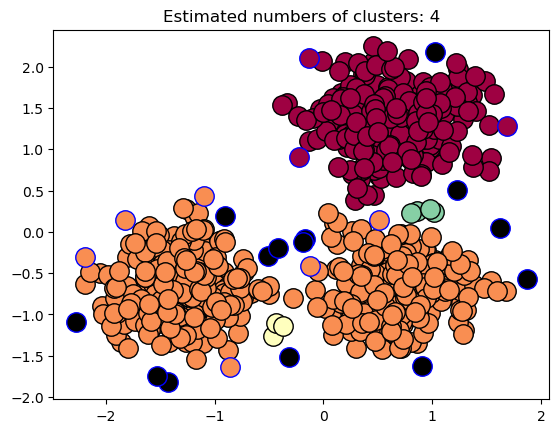

In [31]:
core_samples_mask = np.zeros_like(db.labels_,dtype=bool)
core_samples_mask[db.core_sample_indices_]=True

import matplotlib.pyplot as plt
unique_labels = set(labels)
colors = [plt.cm.Spectral(each)
         for each in np.linspace(0,1,len(unique_labels))]
for k, col in zip(unique_labels,colors):
    if k == -1:
            col = [0,0,0,1]
    class_member_mask = (labels==k)
    xy = X[class_member_mask & core_samples_mask]
    plt.plot(xy[:, 0],xy[:, 1],'o',markerfacecolor = tuple(col),markeredgecolor = 'k',markersize=14)
    xy = X[class_member_mask & ~core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor = tuple(col), markeredgecolor = 'b', markersize=14)
plt.title('Estimated numbers of clusters: %d' % n_clusters_)
plt.show()
        